### Import Necessaries Libraries

In [41]:
## most important
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing
from sklearn.feature_selection import SelectPercentile ,chi2
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

## model selection 
from sklearn.model_selection import train_test_split,cross_val_score, RandomizedSearchCV 

## Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB


import joblib

### Load the data and look at the big picture

In [2]:
## read csv file
df = pd.read_csv('diabetes.csv')

## show the head
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
## check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
## some statistics
df.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


`Comment:  It seems that dataset is contains 768 instances and 9 features 
         - the min value in  5 columns = 0 (Glucose, BloodPressure, Skin Thickness, Insulin, BMI)
         - In skin Thickness and Insulin Column less than or equal 25% of the data are null values
         - all this an errors in data collection`

### Exploratory Data Analysis (EDA)

In [5]:
## convert zeros values to missing values to determine how many missing values in our data

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0 , np.nan)

In [6]:
## check null values 
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### filling missing values

In [7]:
imputer = SimpleImputer(missing_values=np.nan , strategy= 'median')
df = imputer.fit_transform(df)

In [8]:
## convert data to dataframe to deal with
df = pd.DataFrame(df, columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','age','Outcome'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [9]:
## check nulls
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
age                         0
Outcome                     0
dtype: int64

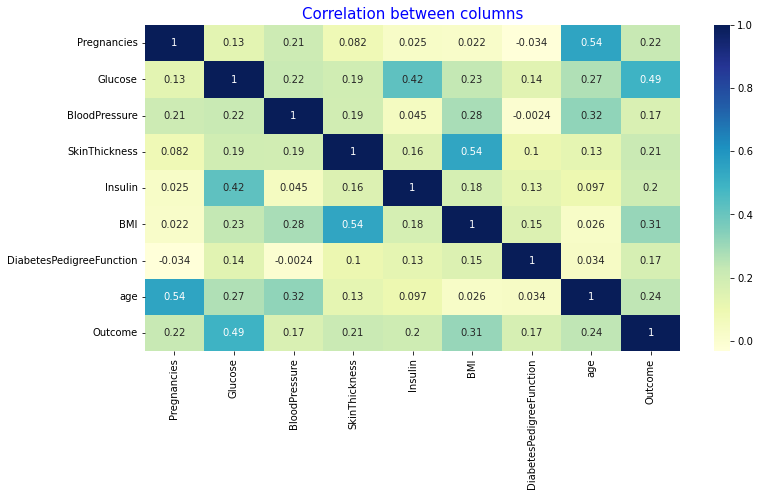

In [10]:
##show correlation
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True,cmap= 'YlGnBu' )
plt.title('Correlation between columns',fontsize = 15 ,color = 'b')
plt.show()

In [11]:
## split the dataset to feature--> X and target--> Y
X = df.drop('Outcome',axis =1)
Y = df['Outcome']

### Feature selection

In [12]:
featureselection = SelectPercentile(score_func=chi2 ,percentile= 80)
new_X = featureselection.fit_transform(X, Y)

In [13]:
featureselection.get_support()

array([ True,  True, False,  True,  True,  True, False,  True])

### Spliting data to train and test

In [14]:
## apply train_test_split
X_train , X_test , Y_train ,Y_test = train_test_split(new_X,Y,test_size=0.2,random_state=42) 

In [15]:
X_train.shape

(614, 6)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Building ML Models

In [17]:
## define function to train models
def train(model ,model_name):
    model.fit(X_train_scaled,Y_train)
    model_train_score = model.score(X_train_scaled,Y_train)
    model_test_score = model.score(X_test_scaled,Y_test)
    print(f'{model_name} score on Training data is {model_train_score}\n {model_name} score on testing data is {model_test_score}')

##function to cross vaidation     
def kfolds(model, model_name):
    model = cross_val_score(model, X,Y, cv=5)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")
    

`1- Linear Regression`

In [18]:
lr = LinearRegression()
train(lr , 'Linear Regression')

Linear Regression score on Training data is 0.31677363433624806
 Linear Regression score on testing data is 0.26745939853853107


`2- Decision Tree`

In [19]:
dt = DecisionTreeClassifier(max_depth= 3,criterion='entropy', random_state=42)
train(dt ,'Decision Tree')

Decision Tree score on Training data is 0.7768729641693811
 Decision Tree score on testing data is 0.7727272727272727


`3- RandomForest`

In [26]:
rf = RandomForestClassifier(n_estimators=100 ,max_depth= 3 ,class_weight='balanced',random_state=42,max_samples=0.8 )
train(rf ,'Random Forest')
kfolds(rf ,'Random Forest')

Random Forest score on Training data is 0.7882736156351792
 Random Forest score on testing data is 0.7532467532467533
Random Forest score on cross validation: 75.65656565656566%


`4- KNN`

In [23]:
knn = KNeighborsClassifier(n_neighbors=10 ,weights='uniform' ,algorithm='auto')
train(knn , 'KNN')
kfolds(knn ,'KNN')

KNN score on Training data is 0.8029315960912052
 KNN score on testing data is 0.7597402597402597
KNN score on cross validation: 74.35786435786437%


`5- Naieve Bayes`

In [24]:
nb = BernoulliNB(binarize=1) 
train(nb , 'NaieveBase')
kfolds(nb, 'Naievebase')

NaieveBase score on Training data is 0.744299674267101
 NaieveBase score on testing data is 0.7337662337662337
Naievebase score on cross validation: 65.49698667345726%


### Tunening for highest score

In [37]:
best_params = {
    'n_estimators':np.arange(100,400,50),
    'max_depth':np.arange(2,10,1),
    'max_samples': [0.6,0.7,0.8,0.9]

}

rand_forest_search = RandomizedSearchCV(estimator= rf, param_distributions= best_params ,n_iter= 20, cv= 5, verbose= 6)

In [38]:
#len(np.arange(100,400,50))*len(np.arange(2,10,1))*len([0.6,0.7,0.8,0.9])
rand_forest_search.fit(X_train_scaled, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=4, max_samples=0.8, n_estimators=250;, score=0.756 total time=   0.2s
[CV 2/5] END max_depth=4, max_samples=0.8, n_estimators=250;, score=0.780 total time=   0.3s
[CV 3/5] END max_depth=4, max_samples=0.8, n_estimators=250;, score=0.740 total time=   0.3s
[CV 4/5] END max_depth=4, max_samples=0.8, n_estimators=250;, score=0.748 total time=   0.2s
[CV 5/5] END max_depth=4, max_samples=0.8, n_estimators=250;, score=0.746 total time=   0.2s
[CV 1/5] END max_depth=7, max_samples=0.6, n_estimators=300;, score=0.780 total time=   0.3s
[CV 2/5] END max_depth=7, max_samples=0.6, n_estimators=300;, score=0.813 total time=   0.3s
[CV 3/5] END max_depth=7, max_samples=0.6, n_estimators=300;, score=0.756 total time=   0.3s
[CV 4/5] END max_depth=7, max_samples=0.6, n_estimators=300;, score=0.756 total time=   0.3s
[CV 5/5] END max_depth=7, max_samples=0.6, n_estimators=300;, score=0.779 total time=   0.3s
[CV 1/5]

[CV 4/5] END max_depth=5, max_samples=0.8, n_estimators=100;, score=0.748 total time=   0.1s
[CV 5/5] END max_depth=5, max_samples=0.8, n_estimators=100;, score=0.746 total time=   0.1s
[CV 1/5] END max_depth=3, max_samples=0.7, n_estimators=300;, score=0.748 total time=   0.3s
[CV 2/5] END max_depth=3, max_samples=0.7, n_estimators=300;, score=0.764 total time=   0.3s
[CV 3/5] END max_depth=3, max_samples=0.7, n_estimators=300;, score=0.764 total time=   0.4s
[CV 4/5] END max_depth=3, max_samples=0.7, n_estimators=300;, score=0.756 total time=   0.3s
[CV 5/5] END max_depth=3, max_samples=0.7, n_estimators=300;, score=0.746 total time=   0.4s
[CV 1/5] END max_depth=6, max_samples=0.9, n_estimators=300;, score=0.764 total time=   0.3s
[CV 2/5] END max_depth=6, max_samples=0.9, n_estimators=300;, score=0.780 total time=   0.3s
[CV 3/5] END max_depth=6, max_samples=0.9, n_estimators=300;, score=0.764 total time=   0.4s
[CV 4/5] END max_depth=6, max_samples=0.9, n_estimators=300;, score=0.

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    max_depth=3,
                                                    max_samples=0.8,
                                                    random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_samples': [0.6, 0.7, 0.8, 0.9],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350])},
                   verbose=6)

In [39]:
best_forest= rand_forest_search.best_estimator_
best_forest

RandomForestClassifier(class_weight='balanced', max_depth=7, max_samples=0.6,
                       n_estimators=300, random_state=42)

In [40]:
train(best_forest, 'Random Forest Tunned')

Random Forest Tunned score on Training data is 0.8762214983713354
 Random Forest Tunned score on testing data is 0.7402597402597403


### Save the best model

In [42]:
joblib.dump(best_forest,'model_randomforest')

['model_randomforest']